[0.15822764 0.11271205 0.05794167 0.05443706 0.04335487 0.03767192
 0.0349922  0.02751116 0.02292302 0.01920428 0.01749243 0.01672538
 0.0146329  0.0136092  0.0121341  0.01178373 0.01125274 0.01033918
 0.00924478 0.00886437]


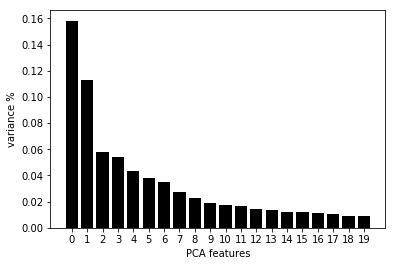

In [11]:
import mllogdpcommon
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

smilelogd, descriptors = mllogdpcommon.import_descriptor ("descriptors.txt")

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(descriptors)
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

In [ ]:
# Da quello che vedo, anche se la varianza spiegata e' minima
# c'e' un drop dopo la seconda componente 

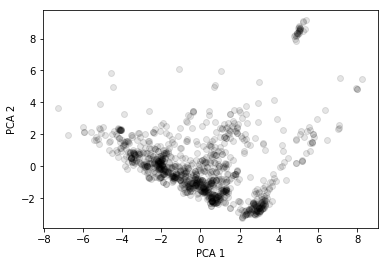

In [12]:
import pandas as pd

PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
# Diciamo che si vedono almeno tre clusters

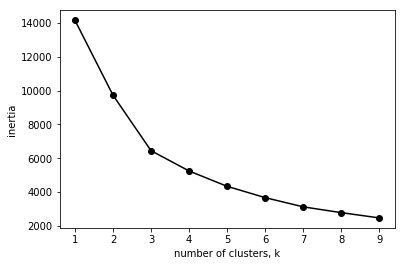

In [16]:
from sklearn.cluster import KMeans

ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# usando l'idea del punto di Elbow possiamo in effetti dire che ci sono tre cluster ben distinti 
# Quindi possiamo immaginare ad esempio di fare tre modelli distinti